## Exploratory Data Analysis(EDA) with IEEE-CIS Fraud Detection Data Set
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of `.head()` function of pandas library which returns first five observations of the data set.Similarly `.tail()` returns last five observations of the data set.
* To found out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.unique()`
    * `.value_counts()`
* To chech missing values in the data set's columns using `.isnull().sum()`
* To use `linear regression` for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.
    * Dark shades represents positive correlation while lighter shades represents negative correlation.
    * If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.
    * It’s a good practice to remove correlated variables during feature selection.
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

### Data Description:
#### Transaction Table 
    * TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
    * TransactionAMT: transaction payment amount in USD
    * ProductCD: product code, the product for each transaction
    * card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
    * addr: address
    * dist: distance
    * P_ and (R__) emaildomain: purchaser and recipient email domain
    * C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
    * D1-D15: timedelta, such as days between previous transaction, etc.
    * M1-M9: match, such as names on card and address, etc.
    * Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
#### Categorical Features:
    * ProductCD
    * card1 - card6
    * addr1, addr2
    * P_emaildomain
    * R_emaildomain
    * M1 - M9

#### Identity Table
    * Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
    * They're collected by Vesta’s fraud protection system and digital security partners.
    * (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

    * “id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”
    
#### Categorical Features:
    * DeviceType
    * DeviceInfo
    * id_12 - id_38   

In [1]:
#This librarys is to work with matrices
import pandas as pd 
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
# to ignore filterwarnings 
import warnings
warnings.filterwarnings('ignore')

# This function makes the plot directly on browser
%matplotlib inline

%config Completer.use_jedi = False

# Seting a universal figure size 
rcParams['figure.figsize'] = 8,6

In [29]:
# Transaction CSVs
train_transaction = pd.read_csv("train_transaction.csv")
test_transaction = pd.read_csv('test_transaction.csv')
# Identity CSVs - These will be merged onto the transactions to create additional features
train_identity = pd.read_csv("train_identity.csv")
test_identity = pd.read_csv('test_identity.csv')
# Sample Submissions
sample_submission = pd.read_csv('sample_submission.csv')

In [25]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
train_identity.head(3)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [31]:
test_identity.head(3)

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0


In [33]:
sample_submission.head(3)

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5


In [34]:
# To found out the total number of rows and columns in the data set
print('train_transaction shape is {}'.format(train_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('test_identity shape is {}'.format(test_identity.shape))
print('sample_submission shape is {}'.format(sample_submission.shape))

train_transaction shape is (590540, 394)
train_identity shape is (144233, 41)
test_transaction shape is (506691, 393)
test_identity shape is (141907, 41)
sample_submission shape is (506691, 2)


In [35]:
# Here we confirm that all of the transactions in `train_identity`
print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique())))
# Here we confirm that all of the transactions in `test_identity`
print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique())))

144233
141907


* 24.4% of TransactionIDs in train have an associated train_identity.
* 28.0% of TransactionIDs in test have an associated test_identity.

* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with .info()

In [44]:
print(train_transaction.info())
print("")
print(test_transaction.info())
print("")
print(train_identity.info())
print("")
print(test_identity.info())
print("")
print(sample_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_

* Data contain Float, integer and object types of data.
* All data sets contain null/missing values except sample_submission. 

#### To Check Missing Values

In [10]:
def missing_data_finder(df):
    """
    This function gets a Python Pandas dataframe and finding missing values in the column of the dataframe. 
    :param df: Dataframe to be analyze     
    :return: This function doesn't return anything.  
    
    """
    df_missing = df.isnull().sum().reset_index().rename(columns={'index': 'column_name', 0: 'missing_row_count'}).copy()
    df_missing_rows = df_missing[df_missing['missing_row_count'] > 0].sort_values(by='missing_row_count',ascending=False)
    df_missing_rows['missing_row_percent'] = (df_missing_rows['missing_row_count'] / df_transaction.shape[0]).round(4)
    return df_missing_rows

In [47]:
missing_data_finder(train_transaction).head()

,column_name,missing_row_count,missing_row_percent
14,dist2,552913,0.9363
37,D7,551623,0.9341
43,D13,528588,0.8951
44,D14,528353,0.8947
42,D12,525823,0.8904


In [48]:
missing_data_finder(train_identity).head()

,column_name,missing_row_count,missing_row_percent
24,id_24,139486,0.2362
25,id_25,139101,0.2355
7,id_07,139078,0.2355
8,id_08,139078,0.2355
21,id_21,139074,0.2355


In [53]:
missing_data_finder(test_transaction).head()

,column_name,missing_row_count,missing_row_percent
13,dist2,470255,0.7963
36,D7,446558,0.7562
41,D12,437437,0.7407
38,D9,432353,0.7321
37,D8,432353,0.7321


In [54]:
missing_data_finder(test_identity).head()

,column_name,missing_row_count,missing_row_percent
24,id-24,137167,0.2323
25,id-25,136868,0.2318
26,id-26,136860,0.2318
21,id-21,136848,0.2317
7,id-07,136848,0.2317


##### Observations: 
* We found NaN values of columns in dataframes. 
* 374 columns of total columns(394) of train_transaction dataframe have NaN values. 
* 38 columns of total columns(41) of train_identity dataframe have NaN values. 
* 345 columns of total columns(393) of test_transaction dataframe have NaN values. 
* 38 columns of total columns(41) of train_identity dataframe have NaN values. 
* We won't fill columns' NaN values that have  more than %51 missing_row_percent. 

### TransactionAmt:

In [66]:
print('Mode of train transaction amt : ', train_transaction[['TransactionAmt']].mode())
print('Mode test transaction amt:', test_transaction[['TransactionAmt']].mode())

Mode of train transaction amt :     TransactionAmt
0            59.0
Mode test transaction amt:    TransactionAmt
0            59.0


In [70]:
print('Statistics of train : ', train_transaction[['TransactionAmt']].describe())
print('Statistics of test :', test_transaction[['TransactionAmt']].describe())

Statistics of train :         TransactionAmt
count   590540.000000
mean       135.027176
std        239.162522
min          0.251000
25%         43.321000
50%         68.769000
75%        125.000000
max      31937.391000
Statistics of test :        TransactionAmt
count   506691.000000
mean       134.725568
std        245.779822
min          0.018000
25%         40.000000
50%         67.950000
75%        125.000000
max      10270.000000


In [69]:
print('Mean transaction amt for fraud is {:.4f}'.format(train_transaction.loc[train_transaction['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train_transaction.loc[train_transaction['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


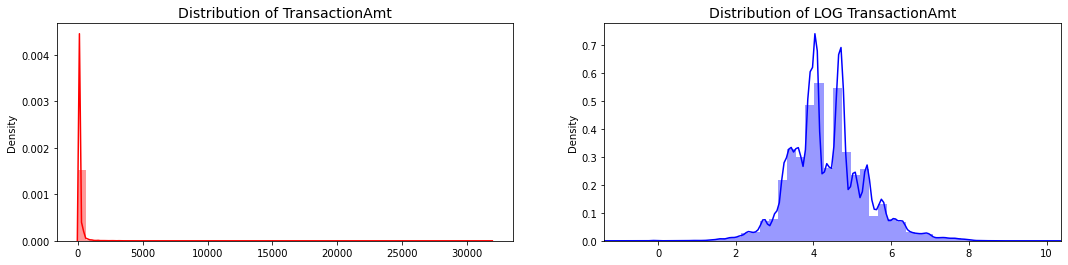

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = train_transaction['TransactionAmt'].values

sns.distplot(time_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionAmt', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionAmt', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

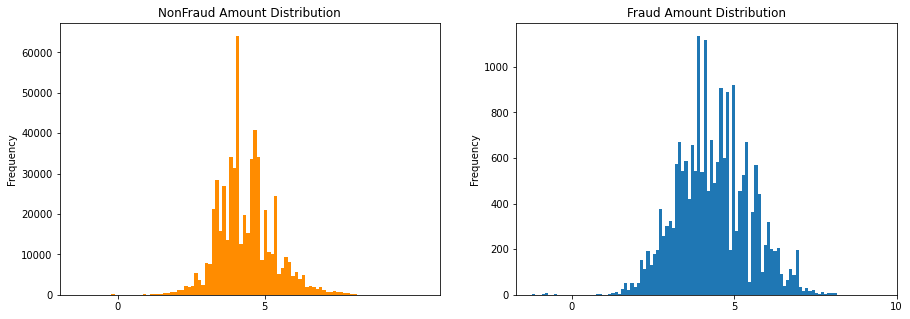

In [58]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train_transaction[df_transaction['isFraud'] == 0]\
['TransactionAmt'].apply(np.log) \
.plot.hist(ax=ax[0],bins=100,color='darkorange')
ax[0].set_title('NonFraud Amount Distribution')
x1=list(range(0,10,5))
ax[0].set_xticks(x1)
    
train_transaction[df_transaction['isFraud'] == 1]\
['TransactionAmt'].apply(np.log) \
.plot.hist(ax=ax[1],bins=100)
ax[1].set_title('Fraud Amount Distribution')
x2=list(range(0,15,5))
ax[1].set_xticks(x2)

##### Observations: 
* Avg TransactionAmt and median-mode are not closely. Distribution is right skewed (positive skew). The Avg of transaction amount is $135. 
* There are outliers at TransactionAmt column. 
* I've taken a log transform in some of these plots to better show the distribution- otherwise the few, very large transactions skew the distribution. Because of the log transfrom, any values between 0 and 1 will appear to be negative.
* Fraudulent charges appear to have a higher average transaction amount. 

### Understanding Target Variable

#### isFraud Column

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

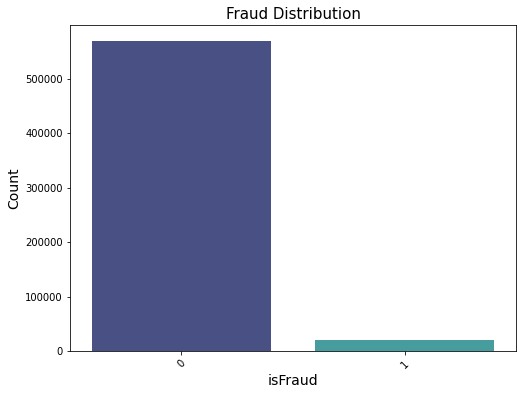

In [17]:
sns.countplot(x='isFraud', data=df_transaction, palette="mako")
plt.xlabel("isFraud", fontsize=14) #seting the xtitle and size
plt.ylabel("Count", fontsize=14) # Seting the ytitle and size
plt.title("Fraud Distribution", fontsize=15) 
plt.xticks(rotation=45)

In [18]:
df_transaction.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

* "isFraud" shows fraud and nonfraud transactions that are from 0: nonFraud, 1: Fraud
* There are 20663 fraud transaction in all data. 
* Most of the transactions are non-fraud.

#### TransactionDT Column

In [71]:
print('Shape of train : ', train_transaction[['TransactionDT']].shape[0])
print('Shape of test : ', test_transaction[['TransactionDT']].shape[0])

Shape of train :  590540
Shape of test :  506691


In [73]:
print('Unique value count of train : ', train_transaction[['TransactionDT']].nunique())
print('Unique value count of test : ', test_transaction[['TransactionDT']].nunique())

Unique value count of train :  TransactionDT    573349
dtype: int64
Unique value count of test :  TransactionDT    494686
dtype: int64


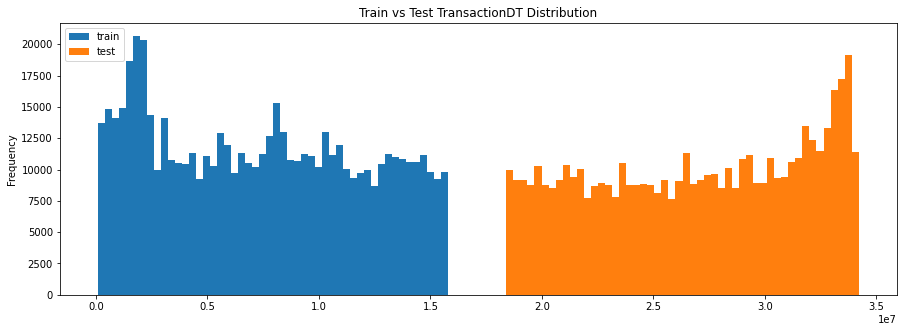

In [76]:
train_transaction['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT Distribution')
test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()

#### To Extract Appellation of Names with Correct Ones:

In [21]:
df_train['Appellation']=df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Appellation 

NameError: name 'df_train' is not defined

In [ ]:
df_train.head(3)

In [ ]:
df_train['Appellation'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Officer','Officer','Mrs','Mrs','Mr',
                         'Officer','Officer','Officer','Mr','Mr'],inplace=True)

In [ ]:
# Defining the figure size of our graphic
plt.figure(figsize=(8,5))

# Plotting the result
sns.countplot(x='Appellation', data=df_train, palette="mako")
plt.xlabel("Appellation", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Appellation Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

#### To Check Missing Values

In [ ]:
# To see missing values with heatmap:

sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False,cmap = 'mako')

#### To Fill Missing Values of Age Column:

* We can fill as appellation of People for example;
    * df_train.groupby('appellation')['Age'].mean() #to check the average age by appellation
    * df_train.loc[(df_train.Age.isnull())&(df_train.appellation == 'Mr'),'Age']=33  # Assigning the NaN Values with the Ceil values of the mean ages (We do it for each appellation) 
I don't choose this option. Because I have to prepare same line for each appellation again and again. I want to create a function for using it at future projects. 


* We can add some condition for doing specific filling. Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's: 
    *  df_train.groupby(["Sex","Pclass","appellation"])["Age"] #We can fill by sex, class of tickets and appellations.  
    * df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','appellation']).Age.transform('median') # using the groupby to transform this variables
    

* We can create a function with this formulation. Also we can use it at other columns that have missing values or we can use it at future projects.   

In [ ]:
# To see age group's medians: 
age_group = df_train.groupby(["Sex","Pclass","Appellation"])["Age"]

# Printing the variabe that we created by median
print(age_group.median())

In [ ]:
# To create a Function: 

def missing_data_filler(df, group_list, column_to_be_filled): 
    df_dummy = df.groupby(group_list)[column_to_be_filled].transform('median') #to see age group's medians
    
    df.loc[df[column_to_be_filled].isnull(), column_to_be_filled] = df_dummy #to fill the rows by age group
    
    return df 

In [ ]:
column_list = ["Sex","Pclass","Appellation"]
df_train = missing_data_filler(df_train,column_list,'Age')

In [ ]:
df_train.head()

In [ ]:
# Printing the total of nulls in Age column:

df_train.isnull().sum()
# or 
print(df_train["Age"].isnull().sum())  # We filled all missing rows at Age column. 

In [ ]:
# To see people's ages who are survived or not survived: 

# Seting the figure size
f,ax=plt.subplots(1,2,figsize=(20,8))

df_train[df_train['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='orange')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train['Survived'] == 1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

##### Observations:
* The age<5 were saved in large numbers(The Women and Child First Policy).
* The group of between 17 and 36 were saved in large numbers. 
* The oldest Passenger was saved(80 years).
* Maximum number of deaths were in the age group of 23-27.

### To See Other Conditions About Survived People:

#### The Relationship between Sex, Pclass and Survived People:

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

In [ ]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='mako')

In [ ]:
pd.crosstab([df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='mako')

##### Observations:
* Because of The Women and Child First Policy, women survived more than men. 
* We can see the discrimination between classes. First class more survived than third class.  
* It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate. 
* Death rate by class:
    * %67,75 third class
    * %17,66 second class
    * %14,59 first class 
* Survived rate by class:
    * %34,80 third class
    * %25,43 second class
    * %39,76 first class

#### The Relationship Between Appellation and Survived People:

In [ ]:
pd.crosstab(df_train.Appellation,df_train.Sex).T.style.background_gradient(cmap='mako') #Checking the Initials with the Sex

In [ ]:
# Figure size
plt.figure(figsize=(12,5))

# Plotting the count of title by Survived or not category
sns.countplot(x='Appellation', data=df_train, palette="mako",
              hue="Survived")
plt.xlabel("Appellations", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Appellation Grouped Count", fontsize=15)
plt.xticks(rotation=45)
plt.show()

##### Observations:
* This charts confirmed us about women and children survived more than men.
* Employees is bottom at survived people. 

In [ ]:
df_train.head()

#### The Relationship Between Port of Embarkation and Survived People:

In [ ]:
pd.crosstab(df_train.Survived,df_train.Embarked,margins=True).style.background_gradient(cmap='mako')

In [ ]:
sns.factorplot('Embarked','Survived',data=df_train)
plt.show()

##### Observations:
* Death rate by Port of Embarkation:
    * %8,56 C = Cherbourg, France
    * %13,67 Q = Queenstown,Ireland
    * %77,77 S = Southampton, England


* Survived rate of Ports: 
    * %55,36 of Cherbourg passangers were survived.
    * %38,96 of Queenstown passangers were survived.
    * %33,70 of Southampton passangers were survived.
    * The chances for survival for Port C is highest around 0.55 while it is lowest for S.

#### The Relationship Between Port of Embarkation, Pclass and Survived People:

In [ ]:
pd.crosstab([df_train.Embarked,df_train.Pclass],df_train.Survived,margins=True).style.background_gradient(cmap='mako')

In [ ]:
plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="mako")
plt.title('Embarked & Pclass Count', fontsize=15)
plt.xlabel('Embarked with Pclass',fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

In [ ]:
pd.crosstab([df_train.Embarked,df_train.Sex],df_train.Survived,margins=True).style.background_gradient(cmap='mako')

In [ ]:
plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Sex",palette="mako")
plt.title('Embarked & Sex Count', fontsize=15)
plt.xlabel('Embarked with Sex',fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

##### Observation: 
* Third class passengers mostly embarked from Southampton, England. Top death rate belong this port. 
* Death rate of Port Southampton's men passangers is %85,25. 

#### The Relationship Between SibSp(Sibling/Spouse) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife
    * 0 = The person is alone 1,2,3,4,5,6,7,8 = Number of family person 

In [ ]:
pd.crosstab(df_train.SibSp,df_train.Survived,margins=True).style.background_gradient(cmap='mako')

In [ ]:
sns.factorplot('SibSp','Survived',data=df_train)
plt.show()

##### Observation:
* %68,17 of passengers had not sibling and spouse.
* %61,17 of survived passengers were alone. %34,21 of alone passengers were survived. 
* If person have 1 or 2 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. 

#### The Relationship Between Parch( parents / children) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
    * 0 = The person is alone 1,2,3,4,5,6 = Number of family person 

In [ ]:
pd.crosstab(df_train.Parch,df_train.Survived,margins=True).style.background_gradient(cmap='mako')

In [ ]:
sns.factorplot('Parch','Survived',data=df_train)
plt.show()

##### Observation:
* %76,09 of passengers had not any parent or child.
* %68,12 of survived passengers were alone. %34,36 of alone passengers were survived. 
* If person have 1, 2 or 3 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. It is same with SibSp column. 

#### The Relationship Between Passanger Fare,Pclass and Survived People:

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,2)
sns.swarmplot(x='Pclass',y="Fare",data=df_train,
              hue="Survived", palette="mako" )
plt.ylabel("Fare Distribution", fontsize=15)
plt.xlabel("Pclass Categorys", fontsize=15)
plt.title("Fare Distribution by Pclass Categories ", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

##### Observation:
* The cheapest ticket fare belong Third class. Most of death in this class. 
* The most expensive ticket fare belong first class. Those who paid the highest fares were survived.

In [ ]:
plt.figure(figsize=(15,5))

# Understanding the Fare Distribuition (Seaborn distplot lets you show a histogram with a line on it.)
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=15, color='b')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=15, color='darkorange')
plt.title("Fare Distribuition by Survived", fontsize=17)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

In [ ]:
df_train['Fare'].min()
df_train['Fare'].median()
df_train['Fare'].mean()
df_train['Fare'].max()
df_train['Fare'].std()
output = None

#### Description Statisctics of Fare Variables
* Min: 0
* Median: 14.45
* Mean: 32.20
* Max: 512.32
* Std: 49.69
I described these at above lines before. 

#### The Correlation of Data Set

In [ ]:
# lets look the correlation of df_train:

plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.corr(),vmax=1.0, annot=True,cmap='mako')
plt.show()

##### Observation:
* The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.
* Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:
    * 1 indicates a strong positive relationship.
    * -1 indicates a strong negative relationship.
    * A result of zero indicates no relationship at all.
* From the above heatmap,we can see that the features are not much correlated. The highest positive correlation is between SibSp and Parch i.e 0.41. The highest negative correlation is between Pclass and Fare i.e -0.55. 